<a href="https://colab.research.google.com/github/alimomennasab/CS4210/blob/main/CS4210Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

import numpy as np
import torch
import torch.nn as nn
!pip install torchview
import torchvision
from torchview import draw_graph

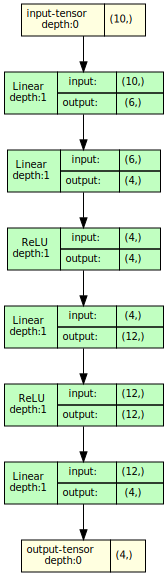

In [2]:
# 1.1

#Create and visualize a new model with three hidden layers.
#The input layer should have 10 neurons
#The first hidden layer should have 6 neurons with no activation.
#The second hidden layer should have 4 neurons with ReLU activation function.
#The third hidden layer should have 12 neurons with ReLU activation.
#The output layer should have 4 neurons.

model = nn.Sequential(
    nn.Linear(10, 6),
    nn.Linear(6, 4),
    nn.ReLU(),
    nn.Linear(4, 12),
    nn.ReLU(),
    nn.Linear(12, 4)
)
# Visualizing the network
model_graph = draw_graph(model, input_size=(10,))
model_graph.visual_graph

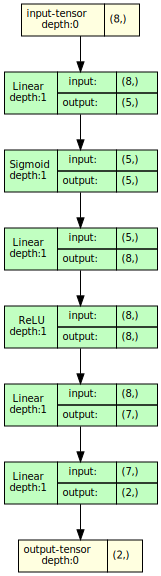

In [3]:
#1.2

#Create and visualize a new model with three hidden layers.
#The input layer should have 8 neurons
#The first hidden layer should have 5 neurons with Sigmoid activation.#
#The second hidden layer should have 8 neurons with ReLU activation function.
#The third hidden layer should have 7 neurons with no activation.
#The output layer should have 2 neurons.

model = nn.Sequential(
    nn.Linear(8, 5),
    nn.Sigmoid(),
    nn.Linear(5, 8),
    nn.ReLU(),
    nn.Linear(8, 7),
    nn.Linear(7, 2)
)

# Visualizing the network
model_graph = draw_graph(model, input_size=(8,))
model_graph.visual_graph

Part 2

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 365kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.22MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.22MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



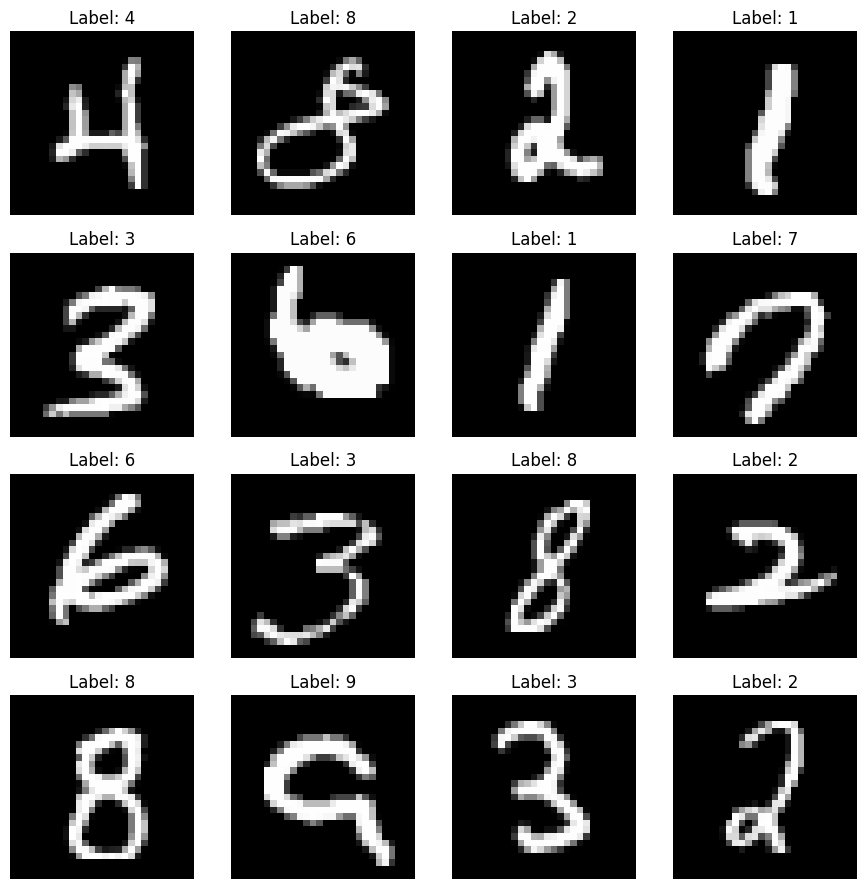

In [4]:
# Step #1

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from fastai.data.core import DataLoaders

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
train_dataset = MNIST(root='./data',
                      train=True,
                      download=True,
                      transform=transform)
valid_dataset = MNIST(root='./data',
                      train=False,
                      download=True,
                      transform=transform)

# Create the DataLoaders object
train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_dataset, batch_size=64, shuffle=True)
dls = DataLoaders(train_dl, valid_dl)

# Set the number of images per row and column in the grid
n_row = 4
n_col = 4

# Get a batch of training data
images, labels = next(iter(train_dl))

# Create a grid of images and labels
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = images[img_idx].reshape(28, 28).numpy()  # Reshape the image to 28x28
        label = labels[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Step 2: Determine the dimension of the data

#In this step, you need to determine if the data needs to be flattened. Determine the dimension of the data with by inspecting one of the images.

#Based on the output that you see, for more than two dimensions the data need to be flattened during step #3
#(i.e. if your output is torch.Size([1, 8]) it doesn't need to be flattened, however, if it's torch.Size([1, 8, 10]) it would need to be flattened).

print(images[0].shape)

torch.Size([1, 28, 28])


In [6]:
# Steps 3 - 6
# because the image size is 3d, we must flatten it
#After the input layer, you will add a hidden layer with 128 neurons,
#then another hidden layer with 64 neurons, followed by an output layer with 10 neurons (for the 10 digits).
#Both hidden layers will have ReLU activation.

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

epoch,train_loss,valid_loss,accuracy,time
0,0.152858,0.132863,0.958800,00:23
1,0.098211,0.090392,0.971600,00:24
2,0.067245,0.080842,0.975300,00:21
3,0.058908,0.078261,0.977300,00:22
4,0.042172,0.075717,0.977900,00:22
5,0.041011,0.084475,0.974800,00:22
6,0.030857,0.082858,0.975900,00:22
7,0.032722,0.081750,0.977600,00:22
8,0.031485,0.088569,0.977000,00:22
9,0.028584,0.088676,0.979500,00:22


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

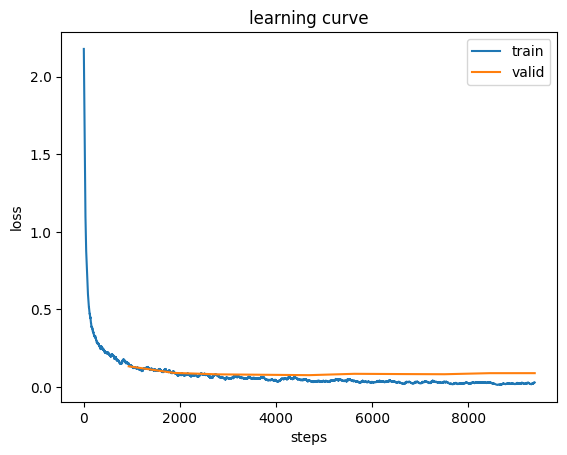

In [7]:
# Step 7
import torch.nn as nn
from fastai.vision.all import *

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=[accuracy])

# Train the model
learn.fit(10, 0.001)

# Plot the training and validation losses
learn.recorder.plot_loss()


In [8]:
# Step 8: evaluate model

# Calculate training accuracy
train_loss, train_accuracy = learn.validate(dl=train_dl)
print(f"Training accuracy: {train_accuracy:.4f}")

# Calculate validation accuracy
valid_loss, valid_accuracy = learn.validate(dl=valid_dl)
print(f"Validation accuracy: {valid_accuracy:.4f}")

Training accuracy: 0.9951


Validation accuracy: 0.9795


In [10]:
# Step 9

# Set the number of images per row and column in the grid
n_row = 4
n_col = 4

# Get a batch of validation data
images, labels = next(iter(valid_dl))

# Get model predictions
with torch.no_grad():
    outputs = model(images)
_, preds = torch.max(outputs, 1)

# Create a grid of images, true labels, and predicted labels
fig, axs = plt.subplots(n_row, n_col, figsize=(9, 9))
for i in range(n_row):
    for j in range(n_col):
        ax = axs[i, j]
        img_idx = i * n_col + j
        img = images[img_idx].reshape(28, 28).numpy()  # Reshape the image to 28x28
        true_label = labels[img_idx].item()
        pred_label = preds[img_idx].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {true_label}, Pred: {pred_label}")
        ax.axis('off')

plt.tight_layout()
plt.show()


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)